<a href="https://colab.research.google.com/github/ashishsaini01/ConvolutionNeuralNets_DeepLearning.ai/blob/master/Anomaly_cardio_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
/content/cardio.npz

In [38]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Model


In [3]:
data = np.load('/content/cardio.npz')

In [29]:
x, tx, ty = data['x'], data['tx'], data['ty']
print(data['x'].shape, '\n', data['tx'].shape ,'\n', data['ty'].shape)

(1479, 21) 
 (352, 21) 
 (352,)


In [31]:
np.unique(ty, return_counts = True)

(array([0, 1]), array([176, 176]))

In [36]:
# normalizing the data using MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range = (0, 1))
x_scaled = min_max_scaler.fit_transform(x)
tx_scaled = min_max_scaler.transform(tx)

In [47]:
class AutoEncoder(Model):
  """
  Parameters

  output_units: int
    Number of output units
  """
  def __init__(self, output_units):
      super().__init__()
      self.encoder = tf.keras.models.Sequential([
        # tf.keras.layers.Dense(32, activation = 'relu'),
        # tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(16, activation = 'relu'),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(output_units, activation = 'relu')
      ])
      self.decoder = tf.keras.models.Sequential([
        tf.keras.layers.Dense(16, activation = 'relu'),
        tf.keras.layers.Dropout(0.1),
        # tf.keras.layers.Dense(32, activation = 'relu'),
        # tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(output_units, activation = 'sigmoid')
      ])

  def call(self, inputs):
    encoded = self.encoder(inputs)
    decoded = self.decoder(encoded)
    return decoded

model = AutoEncoder(output_units = x_scaled.shape[1])

model.compile(optimizer = tf.keras.optimizers.RMSprop(lr = 0.1),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = [tf.keras.metrics.BinaryCrossentropy()])

history = model.fit(x_scaled, x_scaled, epochs = 10, batch_size = 50, validation_data = (tx_scaled, tx_scaled))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


30/30 [==============================] - 1s 19ms/step - loss: 0.7626 - binary_crossentropy: 0.7626 - val_loss: 0.5354 - val_binary_crossentropy: 0.5354
Epoch 2/10
30/30 [==============================] - 0s 3ms/step - loss: 0.4658 - binary_crossentropy: 0.4658 - val_loss: 0.5467 - val_binary_crossentropy: 0.5467
Epoch 3/10
30/30 [==============================] - 0s 3ms/step - loss: 0.4621 - binary_crossentropy: 0.4621 - val_loss: 0.4769 - val_binary_crossentropy: 0.4769
Epoch 4/10
30/30 [==============================] - 0s 3ms/step - loss: 0.4617 - binary_crossentropy: 0.4617 - val_loss: 0.5022 - val_binary_crossentropy: 0.5022
Epoch 5/10
30/30 [==============================] - 0s 4ms/step - loss: 0.4628 - binary_crossentropy: 0.4628 - val_loss: 0.4941 - val_binary_crossentropy: 0.4941
Epoch 6/10
30/30 [==============================] - 0s 3ms/step - loss: 0.4582 - binary_crossentropy: 0.4582 - val_loss: 0.5160 - val_binary_crossentropy: 0.5160
Epoch 7/10
30/30 [====================

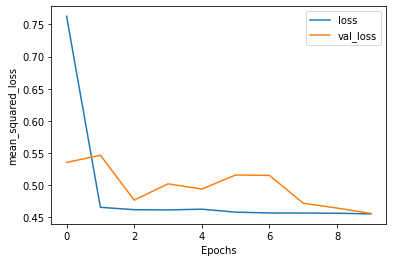

In [48]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('mean_squared_loss')
plt.legend(['loss', 'val_loss'])
plt.show()